In [2]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)



In [4]:
df = pd.read_csv("C:/Users/Chandana D/Downloads/data.csv") 


In [5]:
# 3. Preprocess
# Drop ID / unnecessary columns if present
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)
if 'Unnamed: 32' in df.columns:
    df = df.drop(['Unnamed: 32'], axis=1)

In [6]:
# Map diagnosis to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features & target
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']


In [7]:
# 4. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# 5. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# 6. Fit Logistic Regression
model = LogisticRegression(solver='liblinear')  # solver choice for small dataset
model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [10]:
# 7. Predictions & evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


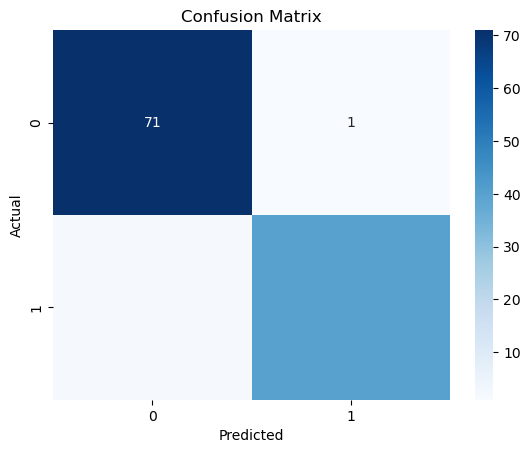

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.996031746031746


In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


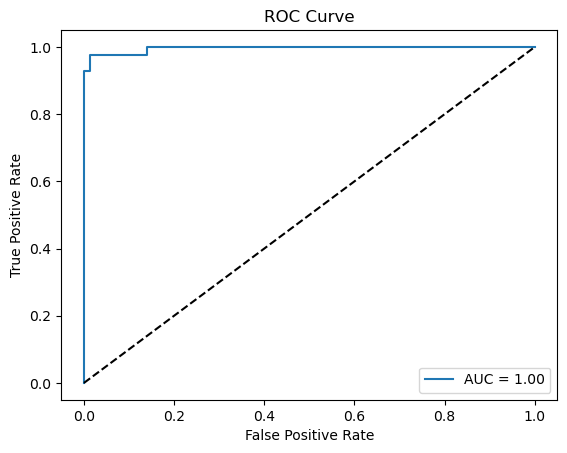

In [12]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()